In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

file_path = 'car_evaluation.csv'
car_data = pd.read_csv(file_path)

# Rename columns for clarity
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']

label_encoders = {}
for column in car_data.columns:
    label_encoders[column] = LabelEncoder()
    car_data[column] = label_encoders[column].fit_transform(car_data[column])

X = car_data.drop('Class', axis=1)
y = car_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree Accuracy: 0.976878612716763

Classification Report (Decision Tree):
              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       118
        good       0.78      0.82      0.80        17
       unacc       0.99      1.00      1.00       361
       vgood       0.88      0.91      0.89        23

    accuracy                           0.98       519
   macro avg       0.91      0.92      0.91       519
weighted avg       0.98      0.98      0.98       519



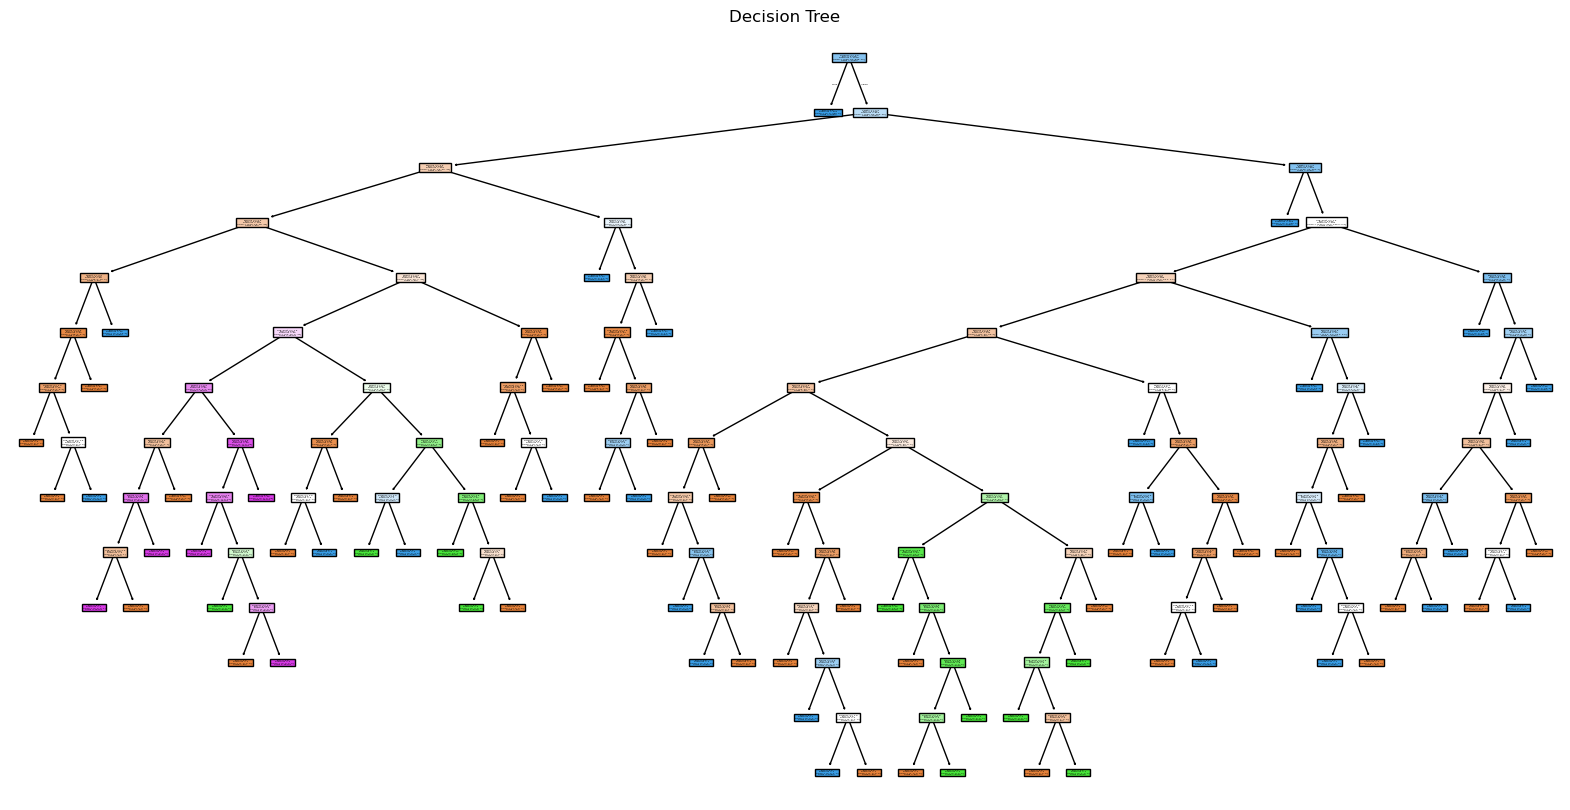

In [52]:
# Train the Decision Tree model (if not already trained)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Generate predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Generate classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=label_encoders['Class'].classes_))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=label_encoders['Class'].classes_, filled=True)
plt.title("Decision Tree")
plt.show()


Random Forest Accuracy: 0.9653179190751445

Classification Report (Random Forest):
              precision    recall  f1-score   support

         acc       0.96      0.92      0.94       118
        good       0.92      0.71      0.80        17
       unacc       0.98      1.00      0.99       361
       vgood       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2276\93540020.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette='viridis')


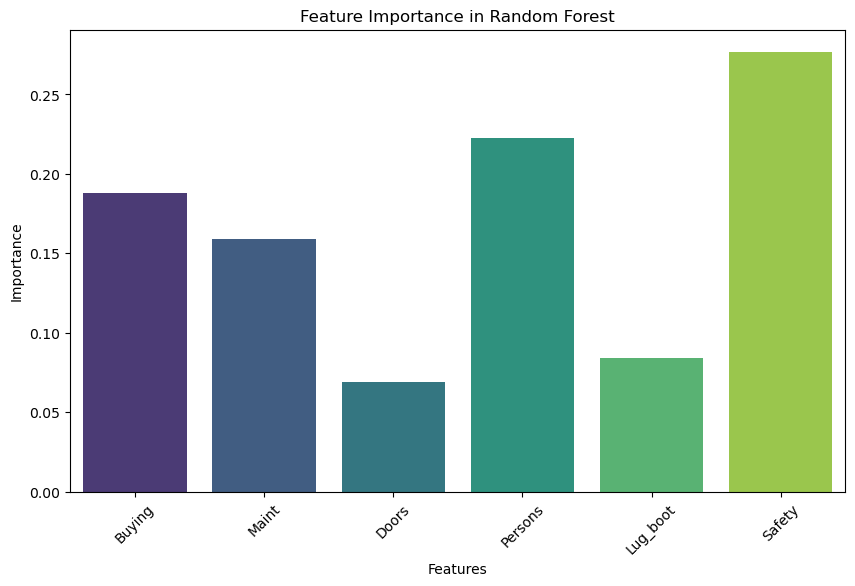

In [53]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoders['Class'].classes_))

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

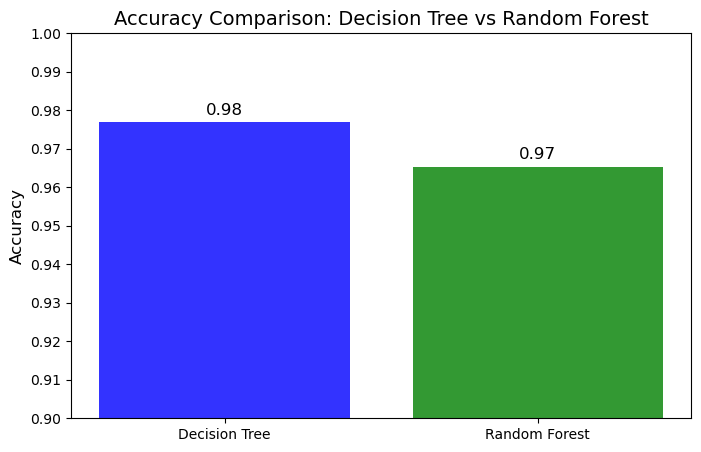

In [54]:
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 5))
colors = ['blue', 'green']
plt.bar(models, accuracies, color=colors, alpha=0.8)
plt.title('Accuracy Comparison: Decision Tree vs Random Forest', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.9, 1)  # Set y-axis range for better clarity
plt.xticks(fontsize=10)
plt.yticks(np.arange(0.9, 1.01, 0.01), fontsize=10)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.2f}", ha='center', fontsize=12, color='black')

plt.show()

현재 결정 트리가 더 좋은 결과가 나왔지만 적정 하이퍼 파라미터를 찾으면 랜덤 포레스트가 더 좋은 성과가 나올 것이다.